In [1]:
!pip install wikipedia
!pip install wikipedia-api

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=1599b83f5c164588c001b92ba9d84d6404935db7de28e62e395c93c4e7872237
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=09f56cf5583153cead0b8f36e201c2eb262e0c108105b0c625705f47c8c36b8f
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


In [2]:
import doc_utils
import max_sim_classifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
from max_sim_classifier import MaxSimClassifier

In [4]:
arxiv_wiki_topics = ["Computer science",
               "Economics",
               "Systems engineering",
               "Mathematics",
               "Astrophysics",
               "Quantitative biology",
               "Quantitative finance",
               "Statistics"]
#note: Astrophysics should be physics, but throws error
topic_defs = doc_utils.concurrentGetWikiFullPage(topics_list =arxiv_wiki_topics )

Obtaining full wikipedia page for the topic: Computer science. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Economics. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Systems engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Mathematics. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Astrophysics. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Quantitative biology. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Quantitative finance. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Statistics. (Definition of Class #[7])


In [13]:
dataset = doc_utils.arxiv_parser(100)

Retrieved 800 papers in total from 8 subjects (100 from each).


In [0]:
x_train, y_train, x_test, y_test = doc_utils.processClassifierData(topic_defs, dataset, arxiv_wiki_topics, dataset_type="arxiv")

In [0]:
max_sim_model = MaxSimClassifier(dataset_type="arxiv")

In [16]:
max_sim_model.fit(x_train, y_train)

MaxSimClassifier(dataset_type='arxiv', epochs=50, min_count=2, vector_size=50)

In [17]:
#note that x_test is not used TODO: change processClassifierData
max_sim_model.score(dataset, y_test)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.384375

In [18]:
predictions = max_sim_model.predict(dataset)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


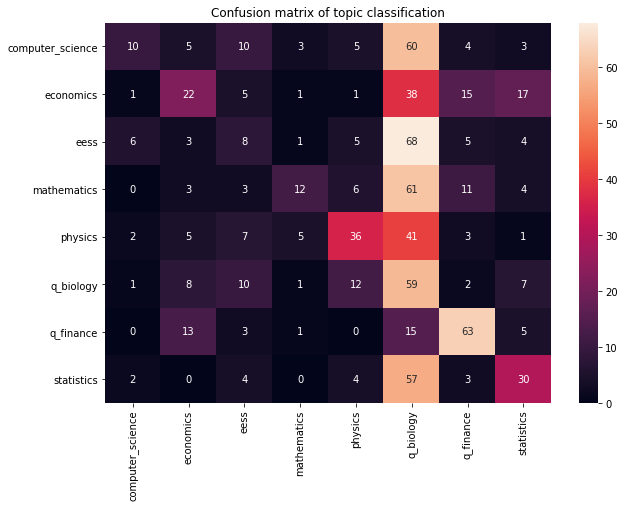

In [19]:
doc_utils.plotConfMatrix(y_test, predictions, model="maxsim", dataset_type="arxiv")

Los fallos localizados en quantitative biology tienen sentido ya que es con diferencia el tópico peor definido.

In [21]:
x_train[5]

'Quantitative biology is an umbrella term encompassing the use of mathematical, statistical or computational techniques to study life and living organisms. The central theme and goal of quantitative biology is the creation of predictive models based on fundamental principles governing living systems.The subfields of biology that employ quantitative approaches include:\n\nMathematical and theoretical biology\nComputational biology\nBioinformatics\nBiostatistics\nSystems biology\nPopulation biology\nSynthetic biology\nEpidemiology\n\n\n== References =='

Mean topic definition length: 23880.875


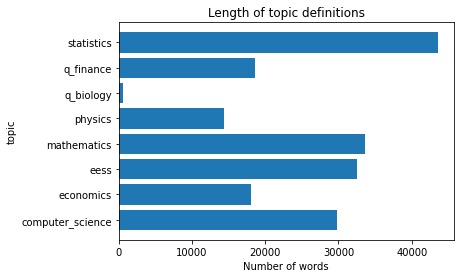

In [34]:
import matplotlib.pyplot as plt

total_len = 0
topic_lengths = list()
for topic in x_train:
    total_len += len(topic)
    topic_lengths.append(len(topic))

print("Mean topic definition length:", total_len/len(x_train))

plt.barh(doc_utils.ARXIV_SUBJECTS, topic_lengths, align='center')
plt.title("Length of topic definitions")
plt.xlabel("Number of words")
plt.ylabel("topic")
plt.show()